# Krzywe Eliptyczne

## Krzywa nad ciałem R

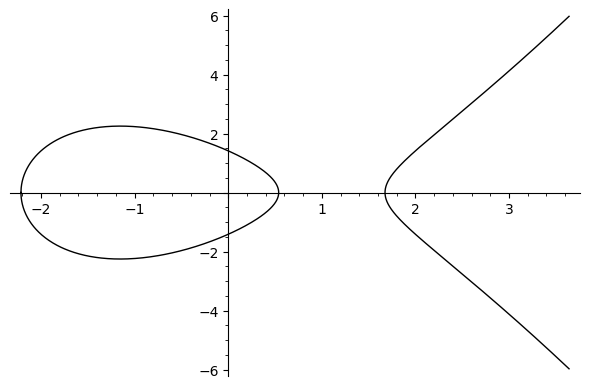

In [43]:
sage: Er = EllipticCurve([-4,2])

sage: pl = plot(Er,rgbcolor=(0,0,0))
pl

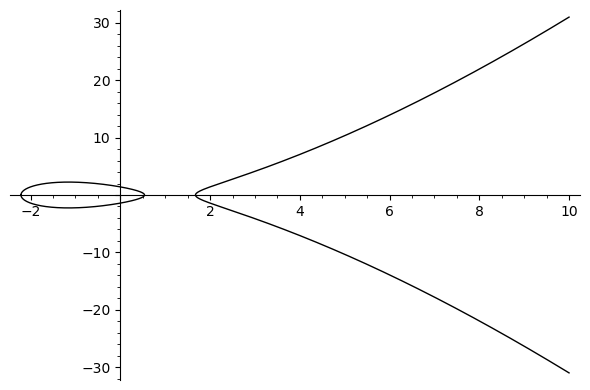

In [47]:
sage: plot(Er, (-10,10), rgbcolor=(0,0,0))

In [24]:
# Policzone pare punktów (recznie)
sage: x, y = var('x, y')
sage: solve([y^2==x^3-4*x+2, y==9], x, y)

[[x == 4.601075268817205, y == 9.0], [x == (-2.300537861715356 + 3.446363788046408*I), y == 9.0], [x == (-2.300537861715356 - 3.446363788046408*I), y == 9.0]]

## Krzywa nad ciałem GF(7)

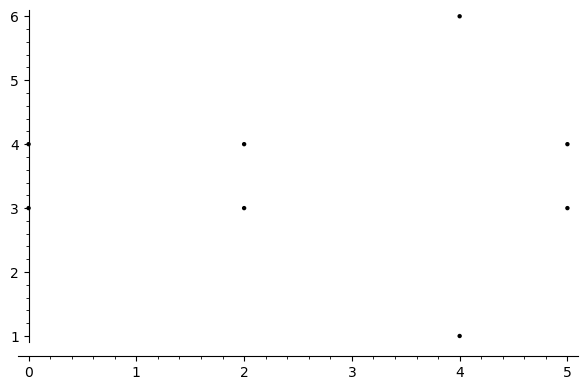

In [29]:

sage: G = GF(7)
sage: Ef = EllipticCurve(G, [-4,2])

sage: pl = plot(Ef, rgbcolor=(0,0,0))
pl

In [30]:
sage: Ef.points()

[(0 : 1 : 0), (0 : 3 : 1), (0 : 4 : 1), (2 : 3 : 1), (2 : 4 : 1), (4 : 1 : 1), (4 : 6 : 1), (5 : 3 : 1), (5 : 4 : 1)]

## Inna Krzywa (Trustica)

[seria yt](https://www.youtube.com/watch?v=WnBEZ0qNdV0&list=PLN9KZDpNfsHMd7d7PX87JGesGY_Qzyb3V&index=6)

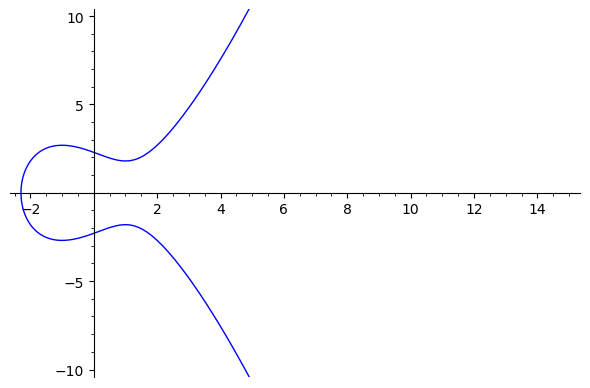

In [41]:
sage: Ef = EllipticCurve([-3, 5.250])
plot(Ef, (-15, 15), ymin=-10, ymax=10)

In [88]:
Ef(0)

(0.000000000000000 : 1.00000000000000 : 0.000000000000000)

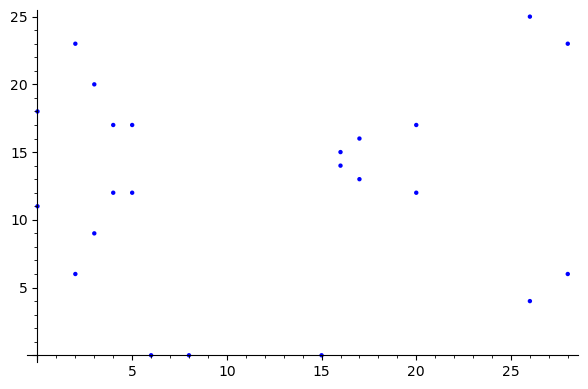

In [83]:
Gf = GF(29)
sage: Eg = EllipticCurve(Gf, [-3,5])
plot(Eg)


In [75]:
Eg.points()

[(0 : 1 : 0), (1 : 7 : 1), (1 : 16 : 1), (3 : 0 : 1), (5 : 0 : 1), (10 : 3 : 1), (10 : 20 : 1), (12 : 8 : 1), (12 : 15 : 1), (13 : 1 : 1), (13 : 22 : 1), (14 : 4 : 1), (14 : 19 : 1), (15 : 0 : 1), (21 : 7 : 1), (21 : 16 : 1)]

In [155]:

Gf = GF(7)

E = EllipticCurve(Gf,[3,4])

# Dodawanie punktów na krzywej nad ciałem skończonym
def ell_add(E, P1, P2):
    a, b, p = E
    if P1 == "inf": return P2
    if P2 == "inf": return P1
    x1, y1 = P1; x2,y2 = P2
    x1 %= p; y1 %= p; x2 %= p; y2 %= p;

    if x1 == x2 and y1 == p-y2: return "inf"

    if P1 == P2:
        if y1 == 0: return "inf"
        lam = (3*x1^2+a) * inverse_mod(2*y1,p)
    else:
        lam = (y1-y2) * inverse_mod(x1-x2,p)
    x3 = lam^2 - x1 - x2
    y3 = -lam*x3 - y1 + lam*x1
    return (x3%p, y3%p)

P1 = E.random_point()
a = E.a4()
b = E.a6()
e = (a,b,Gf.order())

p1 = (2,5)
print(p1)
for _ in range(9):
    p1 = ell_add(e, p1, p1)
    p1 = (Integer(p1[0]),Integer(p1[1]))
    print(p1)



(2, 5)
(0, 5)
(1, 1)
(0, 2)
(1, 6)
(0, 5)
(1, 1)
(0, 2)
(1, 6)
(0, 5)


/usr/lib/python3/dist-packages/sage/plot/point.py:288: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  subplot.scatter(self.xdata, self.ydata, s=s, c=c, alpha=a, zorder=z,


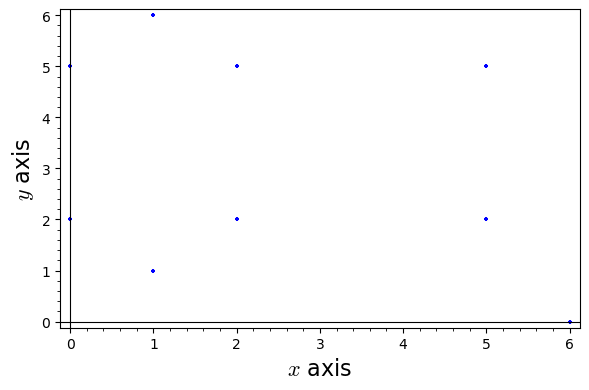

In [103]:

p = plot(E, marker="+",frame="true")
p.axes_labels(['$x$ axis', '$y$ axis'])                               
p

In [152]:
E.points(), len(E.points())

([(0 : 1 : 0), (0 : 2 : 1), (0 : 5 : 1), (1 : 1 : 1), (1 : 6 : 1), (2 : 2 : 1), (2 : 5 : 1), (5 : 2 : 1), (5 : 5 : 1), (6 : 0 : 1)],
 10)